Goal:
- Average daily
- Average weekly

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pypsa

/home/energyls/micromamba/envs/pypsa-earth/lib/python3.10/site-packages/pypsa/networkclustering.py:16: UserWarning: The namespace `pypsa.networkclustering` is deprecated and will be removed in PyPSA v0.24. Please use `pypsa.clustering.spatial instead`. 
  warnings.warn(


In [81]:
prefix = "/mnt/c/Users/scl38887/Documents/git/"
path = "aldehyde/workflow/subworkflows/pypsa-earth-sec/results/nresults_full_3H_ws/postnetworks/elec_s_10_ec_lc1.0_Co2L0.90_3H_2030_0.15_DF_0export.nc"


n = pypsa.Network(prefix + path)

INFO:pypsa.io:Imported network elec_s_10_ec_lc1.0_Co2L0.90_3H_2030_0.15_DF_0export.nc has buses, carriers, generators, global_constraints, lines, links, loads, storage_units, stores


In [137]:
def calculate_rldc(n, resample="H"):

    # Get load
    load = n.loads_t.p_set[n.loads[n.loads.carrier == "AC"].index].sum(axis=1)

    # Get feed-in of wind 
    wind_power = n.generators.p_nom_opt[n.generators[n.generators.carrier == "onwind"].index]
    wind_profile = n.generators_t.p_max_pu[n.generators[n.generators.carrier == "onwind"].index]
    wind_feed_in = n.generators_t.p[n.generators[n.generators.carrier == "onwind"].index].sum(axis=1)
    wind_feed_in_max = (wind_power * wind_profile).sum(axis=1)    

    # Get feed-in of solar
    solar_power = n.generators.p_nom_opt[n.generators[n.generators.carrier == "solar"].index]
    solar_profile = n.generators_t.p_max_pu[n.generators[n.generators.carrier == "solar"].index]
    solar_feed_in = n.generators_t.p[n.generators[n.generators.carrier == "solar"].index].sum(axis=1)
    solar_feed_in_max = (solar_power * solar_profile).sum(axis=1)

    # Calculate residual load
    rldc = load - wind_feed_in - solar_feed_in

    # Average hourly, daily, weekly
    rldc = rldc.resample(resample).ffill()

    # Sort residual load
    rldc = rldc.sort_values(ascending=False)
    rldc = rldc.reset_index(drop=True)

    return rldc

In [128]:
rldc = calculate_rldc(n, resample="H")

In [133]:
# average rldc over NaN values
rldc.ffill().head(20)

snapshot
2013-01-01 00:00:00    4958.974730
2013-01-01 01:00:00    4958.974730
2013-01-01 02:00:00    4958.974730
2013-01-01 03:00:00    4856.808138
2013-01-01 04:00:00    4856.808138
2013-01-01 05:00:00    4856.808138
2013-01-01 06:00:00    5720.874460
2013-01-01 07:00:00    5720.874460
2013-01-01 08:00:00    5720.874460
2013-01-01 09:00:00    6368.680593
2013-01-01 10:00:00    6368.680593
2013-01-01 11:00:00    6368.680593
2013-01-01 12:00:00    6213.263765
2013-01-01 13:00:00    6213.263765
2013-01-01 14:00:00    6213.263765
2013-01-01 15:00:00    6107.723038
2013-01-01 16:00:00    6107.723038
2013-01-01 17:00:00    6107.723038
2013-01-01 18:00:00    6920.261132
2013-01-01 19:00:00    6920.261132
Freq: H, dtype: float64

In [129]:
rldc

snapshot
2013-01-01 00:00:00    4958.974730
2013-01-01 01:00:00            NaN
2013-01-01 02:00:00            NaN
2013-01-01 03:00:00    4856.808138
2013-01-01 04:00:00            NaN
                          ...     
2013-12-31 17:00:00            NaN
2013-12-31 18:00:00    7497.199877
2013-12-31 19:00:00            NaN
2013-12-31 20:00:00            NaN
2013-12-31 21:00:00    6563.370696
Freq: H, Length: 8758, dtype: float64

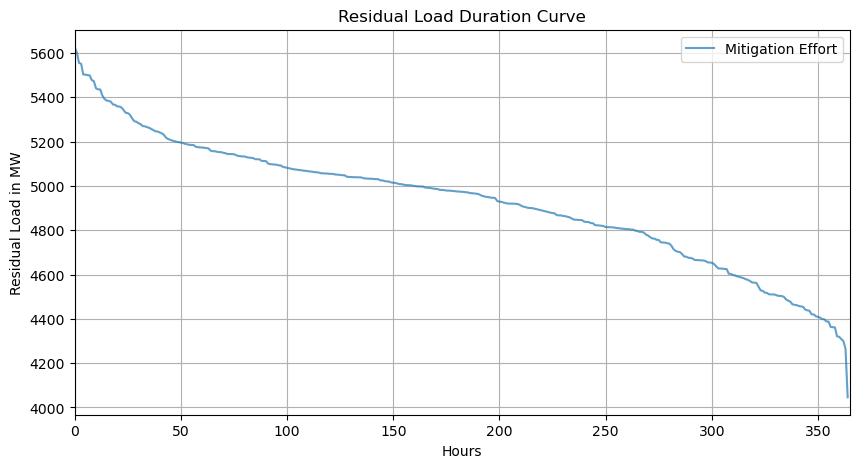

In [139]:
fig = plt.figure(figsize=(10, 5))

# Get and plot the data
rldc = calculate_rldc(n, resample="D")
rldc.plot(label="Mitigation Effort", alpha=.7)

# Add a title
plt.title("Residual Load Duration Curve")

# Add axis labels
plt.xlabel("Hours")
plt.ylabel("Residual Load in MW")
plt.xlim(0, len(rldc))
plt.legend()
plt.grid()
plt.show()

<AxesSubplot:xlabel='snapshot'>

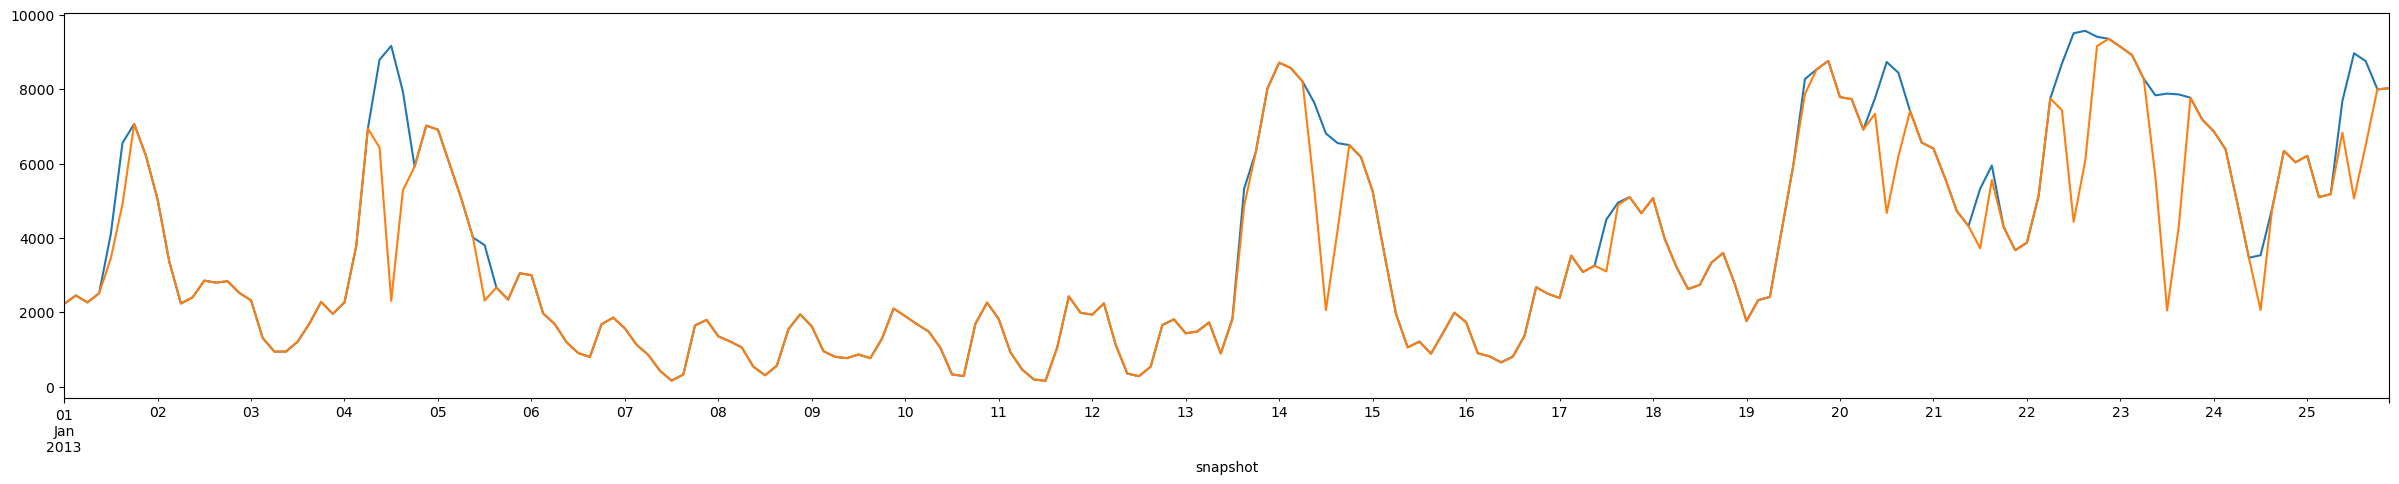

In [47]:
fig = plt.figure(figsize=(30, 5))
#n.generators_t.p[n.generators[n.generators.carrier == "onwind"].index].sum(axis=1).plot() #.sum() / 1e6 * 3
wind_power = n.generators.p_nom_opt[n.generators[n.generators.carrier == "onwind"].index]
wind_profile = n.generators_t.p_max_pu[n.generators[n.generators.carrier == "onwind"].index]
wind_feed_in = n.generators_t.p[n.generators[n.generators.carrier == "onwind"].index].sum(axis=1)
(wind_profile * wind_power).sum(axis=1).plot() #.sum() / 1e6 * 3
wind_feed_in.plot()

